# Baseline Models on MultiTS-Eval using run_multieval Functions

This notebook demonstrates how to run traditional baseline forecasting models on the MultiTS-Eval benchmark using the functions from `run_multieval.py`. This provides a comparison baseline for more advanced models like Chronos.

We will use the MultiTS-Eval framework to load the data and run multiple baseline models including Mean, Linear Trend, ARIMA, and Exponential Smoothing.


In [1]:
import os
import pandas as pd
import numpy as np
import torch
from pathlib import Path
from typing import Optional

# Enable inline plotting in Jupyter notebook
%matplotlib inline
import matplotlib.pyplot as plt

# Import MultiTS-Eval components
from multieval.data import Benchmark
from multieval.metrics import MAPE, MAE, RMSE, NMAE

# Import functions from the examples package
from examples import (
    run_models_on_benchmark, 
    compare_model_performance, 
    export_hierarchical_results_to_csv
)
from examples.save_submission import save_submission

# Import baseline models
from multieval.baselines import (
    MeanForecast,
    LinearTrend,
    ARIMAForecast,
    ExponentialSmoothing,
    LinearRegressionForecast,
    HistoricalInertia
)

print("MultiTS-Eval components imported successfully!")


MultiTS-Eval components imported successfully!


In [2]:
# Configuration
BENCHMARK_PATH = "../../multits-eval-nested/"  # Adjust this path to your MultiTS-Eval data
MAX_WINDOWS = 3  # Limit windows per dataset for faster testing
OUTPUT_DIR = "../../multieval_runs/baseline_models"

# Create output directory
os.makedirs(OUTPUT_DIR, exist_ok=True)

print(f"Benchmark path: {BENCHMARK_PATH}")
print(f"Output directory: {OUTPUT_DIR}")


Benchmark path: ../../multits-eval-nested/
Output directory: ../../multieval_runs/baseline_models


In [3]:
# Initialize baseline models
print("Initializing baseline models...")

# Define models dictionary (same format as run_multieval.py)
models = {
    "mean": {"model": MeanForecast(), "univariate": True},
    "linear_trend": {"model": LinearTrend(), "univariate": True},
    "arima": {"model": ARIMAForecast(), "univariate": True},
    "exponential_smoothing": {"model": ExponentialSmoothing(), "univariate": True},
    "linear_regression": {"model": LinearRegressionForecast(), "univariate": False},
    "historical_inertia": {"model": HistoricalInertia(), "univariate": True}
}

print(f"Initialized {len(models)} baseline models:")
for model_name in models.keys():
    print(f"  - {model_name}")


Initializing baseline models...
Initialized 6 baseline models:
  - mean
  - linear_trend
  - arima
  - exponential_smoothing
  - linear_regression
  - historical_inertia


In [4]:
# Import plotting utilities
import matplotlib.pyplot as plt
from multieval.plotting import plot_window_forecasts, plot_multiple_windows, plot_baseline_comparison

# Run baseline models evaluation with plot data collection (one window per dataset)
print("Starting baseline models evaluation with plot data collection...")

# Run evaluation using the efficient run_multieval function with plot data collection
results = run_models_on_benchmark(
    benchmark_path=BENCHMARK_PATH,
    models=models,
    max_windows=MAX_WINDOWS,
    history_length=512,
    forecast_horizon=128,
    stride=256,
    load_cached_counts=True,
    collect_plot_data=True  # Enable plot data collection
)

print("Evaluation completed successfully!")

# Use plot data directly from results
if '_plot_data' in results:
    plot_data = results['_plot_data']
    print(f"\nUsing {len(plot_data)} windows directly from results for plotting")
    print("Plot data ready for visualization!")
else:
    print("No plot data collected during evaluation.")


Starting baseline models evaluation with plot data collection...
Running Multiple Models on Benchmark


Loading KITTI data from ../../multits-eval-nested/sequential/KITTI
Found 6114 parquet files
Successfully loaded 6114 valid files
Domain ALL_DATASETS not found in file hierarchy
loading window counts from ../../multits-eval-nested/sequential_window_counts_h512_f128_s256.json
loaded 8 cached window counts for category sequential
['hopper_csv_out', 'spriteworld', 'ant_csv_out', 'cheetah_csv_out', 'walker2d_csv_out', 'KITTI', 'openwebtext_timeseries_csvs', 'cifar100_timeseries_csvs']
successfully counted windows from cached JSON files
Dataset aus_electricity not found in data_hierarchy.json
Loading ECL data from ../../multits-eval-nested/traditional/ecl
Found 1 parquet files
Successfully loaded 206 valid chunks
Dataset aus_electricity_nsw not found in file hierarchy
Dataset aus_electricity_qld not found in file hierarchy
Dataset cursor-tabs not found in file hierarchy
Domain ALL_DATASETS not found in file hierarchy
loading window counts from ../../multits-eval-nested/traditional_window_cou

Processing datasets:   0%|          | 0/83 [00:00<?, ?dataset/s, Processing: hopper_csv_out]

  Processing 3 windows with 6 models...


    linear_regression_univariate: 3 windows in 0.18s with MAPE 99.90%


Processing datasets:   1%|          | 1/83 [00:00<00:14,  5.59dataset/s, Processing: spriteworld]   

  Completed dataset hopper_csv_out with 3 windows
  Processing 3 windows with 6 models...


  Historical range: [-1.71e+00, 1.08e+00]
  Forecast range before clipping: [-4.25e+02, -3.25e+00]
  Forecast range after clipping: [-2.96e+01, -3.25e+00]
EXTREME MAPE in normal case - batch 0: 11621.40
  y_true range: [-1.01e+00, 2.19e+00]
  y_pred range: [-2.96e+01, -3.25e+00]
  denominator range: [5.10e-03, 2.19e+00]
  min_threshold: 4.03e-03
  raw MAPE range: [1.45e+03, 3.89e+05]
SUMMARY: 1 extreme MAPE values (>1000%) detected!
Extreme MAPE indices: [0]
Extreme MAPE values: [11621.40231277]


Processing datasets:   2%|▏         | 2/83 [00:00<00:16,  4.97dataset/s, Processing: ant_csv_out]

    linear_regression_univariate: 3 windows in 0.21s with MAPE 438.29%
  Completed dataset spriteworld with 3 windows
  Processing 3 windows with 6 models...


EXTREME MAPE in normal case - batch 0: 1104.61
  y_true range: [-8.50e+00, 4.64e+00]
  y_pred range: [-5.14e+00, 4.63e+00]
  denominator range: [1.35e-02, 8.50e+00]
  min_threshold: 1.35e-02
  raw MAPE range: [4.04e-01, 3.43e+04]
SUMMARY: 1 extreme MAPE values (>1000%) detected!
Extreme MAPE indices: [0]
Extreme MAPE values: [1104.60780825]
EXTREME MAPE in normal case - batch 0: 2900.30
  y_true range: [-3.79e+00, 4.79e+00]
  y_pred range: [-8.50e+00, 4.64e+00]
  denominator range: [9.25e-03, 4.79e+00]
  min_threshold: 9.25e-03
  raw MAPE range: [5.89e-01, 6.09e+04]
SUMMARY: 1 extreme MAPE values (>1000%) detected!
Extreme MAPE indices: [0]
Extreme MAPE values: [2900.29680836]


Processing datasets:   4%|▎         | 3/83 [00:00<00:14,  5.49dataset/s, Processing: cheetah_csv_out]

EXTREME MAPE in normal case - batch 0: 1505.49
  y_true range: [-3.79e+00, 4.79e+00]
  y_pred range: [-8.50e+00, 4.64e+00]
  denominator range: [1.15e-02, 4.79e+00]
  min_threshold: 1.15e-02
  raw MAPE range: [7.64e+00, 7.37e+04]
SUMMARY: 1 extreme MAPE values (>1000%) detected!
Extreme MAPE indices: [0]
Extreme MAPE values: [1505.48840612]
    linear_regression_univariate: 3 windows in 0.16s with MAPE 224.38%
  Completed dataset ant_csv_out with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:   5%|▍         | 4/83 [00:00<00:14,  5.64dataset/s, Processing: walker2d_csv_out]

    linear_regression_univariate: 3 windows in 0.17s with MAPE 100.62%
  Completed dataset cheetah_csv_out with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:   6%|▌         | 5/83 [00:00<00:12,  6.18dataset/s, Processing: KITTI]           

EXTREME MAPE in normal case - batch 0: 1788.41
  y_true range: [-1.00e+01, 1.00e+01]
  y_pred range: [1.00e+01, 1.00e+01]
  denominator range: [5.72e-02, 1.00e+01]
  min_threshold: 5.72e-02
  raw MAPE range: [1.59e-01, 1.76e+04]
SUMMARY: 1 extreme MAPE values (>1000%) detected!
Extreme MAPE indices: [0]
Extreme MAPE values: [1788.41428297]
EXTREME MAPE in normal case - batch 0: 1667.91
  y_true range: [-1.00e+01, 1.00e+01]
  y_pred range: [9.33e+00, 9.33e+00]
  denominator range: [5.72e-02, 1.00e+01]
  min_threshold: 5.72e-02
  raw MAPE range: [2.59e+00, 1.64e+04]
SUMMARY: 1 extreme MAPE values (>1000%) detected!
Extreme MAPE indices: [0]
Extreme MAPE values: [1667.91211583]
EXTREME MAPE in normal case - batch 0: 1632.20
  y_true range: [-1.00e+01, 1.00e+01]
  y_pred range: [9.01e+00, 9.27e+00]
  denominator range: [5.72e-02, 1.00e+01]
  min_threshold: 5.72e-02
  raw MAPE range: [3.11e+00, 1.62e+04]
SUMMARY: 1 extreme MAPE values (>1000%) detected!
Extreme MAPE indices: [0]
Extreme MAP

Processing datasets:   7%|▋         | 6/83 [00:00<00:11,  6.82dataset/s, Processing: openwebtext_timeseries_csvs]

    linear_regression_univariate: 3 windows in 0.12s with MAPE 209.70%
  Completed dataset KITTI with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:   8%|▊         | 7/83 [00:01<00:10,  7.13dataset/s, Processing: cifar100_timeseries_csvs]   

    linear_regression_univariate: 3 windows in 0.13s with MAPE 183.33%
  Completed dataset openwebtext_timeseries_csvs with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  10%|▉         | 8/83 [00:01<00:09,  7.52dataset/s, Processing: fl_electricity]          

    linear_regression_univariate: 3 windows in 0.12s with MAPE 188.44%
  Completed dataset cifar100_timeseries_csvs with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  11%|█         | 9/83 [00:01<00:09,  7.52dataset/s, Processing: ny_electricity2025]

    linear_regression_univariate: 3 windows in 0.10s with MAPE 34.74%
  Completed dataset fl_electricity with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  12%|█▏        | 10/83 [00:01<00:09,  7.89dataset/s, Processing: ecl]               

    linear_regression_univariate: 3 windows in 0.14s with MAPE 11.99%
  Completed dataset ny_electricity2025 with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  13%|█▎        | 11/83 [00:01<00:10,  6.58dataset/s, Processing: central_electricity]

    linear_regression_univariate: 3 windows in 0.22s with MAPE 107.24%
  Completed dataset ecl with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  14%|█▍        | 12/83 [00:01<00:10,  6.58dataset/s, Processing: eastern_electricity]

    linear_regression_univariate: 3 windows in 0.09s with MAPE 9.96%
  Completed dataset central_electricity with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  16%|█▌        | 13/83 [00:01<00:08,  7.94dataset/s, Processing: northern_electricity]

    linear_regression_univariate: 3 windows in 0.09s with MAPE 15.68%
  Completed dataset eastern_electricity with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  17%|█▋        | 14/83 [00:01<00:08,  7.94dataset/s, Processing: southern_electricity]

    linear_regression_univariate: 3 windows in 0.09s with MAPE 12.39%
  Completed dataset northern_electricity with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  18%|█▊        | 15/83 [00:02<00:07,  8.76dataset/s, Processing: western_electricity] 

    linear_regression_univariate: 3 windows in 0.10s with MAPE 7.80%
  Completed dataset southern_electricity with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  19%|█▉        | 16/83 [00:02<00:07,  8.76dataset/s, Processing: az_electricity]     

    linear_regression_univariate: 3 windows in 0.09s with MAPE 9.98%
  Completed dataset western_electricity with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  20%|██        | 17/83 [00:02<00:07,  8.54dataset/s, Processing: id_electricity]

    linear_regression_univariate: 3 windows in 0.15s with MAPE 11.27%
  Completed dataset az_electricity with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  22%|██▏       | 18/83 [00:02<00:07,  8.39dataset/s, Processing: pa_electricity]

    linear_regression_univariate: 3 windows in 0.13s with MAPE 7.69%
  Completed dataset id_electricity with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  23%|██▎       | 19/83 [00:02<00:08,  7.92dataset/s, Processing: tx_electricity]

    linear_regression_univariate: 3 windows in 0.15s with MAPE 18.35%
  Completed dataset pa_electricity with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  24%|██▍       | 20/83 [00:02<00:08,  7.30dataset/s, Processing: cal_electricity]

    linear_regression_univariate: 3 windows in 0.17s with MAPE 22.63%
  Completed dataset tx_electricity with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  25%|██▌       | 21/83 [00:02<00:08,  7.51dataset/s, Processing: ne_electricity] 

    linear_regression_univariate: 3 windows in 0.12s with MAPE 9.98%
  Completed dataset cal_electricity with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  27%|██▋       | 22/83 [00:03<00:08,  7.41dataset/s, Processing: se_electricity]

    linear_regression_univariate: 3 windows in 0.14s with MAPE 13.83%
  Completed dataset ne_electricity with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  28%|██▊       | 23/83 [00:03<00:08,  6.80dataset/s, Processing: car_electricity]

    linear_regression_univariate: 3 windows in 0.18s with MAPE 26.60%
  Completed dataset se_electricity with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  29%|██▉       | 24/83 [00:03<00:08,  6.64dataset/s, Processing: or_electricity] 

    linear_regression_univariate: 3 windows in 0.16s with MAPE 25.54%
  Completed dataset car_electricity with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  30%|███       | 25/83 [00:03<00:08,  7.01dataset/s, Processing: tn_electricity]

    linear_regression_univariate: 3 windows in 0.12s with MAPE 10.35%
  Completed dataset or_electricity with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  31%|███▏      | 26/83 [00:03<00:08,  6.90dataset/s, Processing: al_daily]      

    linear_regression_univariate: 3 windows in 0.15s with MAPE 26.08%
  Completed dataset tn_electricity with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  33%|███▎      | 27/83 [00:03<00:07,  7.07dataset/s, Processing: az_daily]

    linear_regression_univariate: 3 windows in 0.13s with MAPE 24.83%
  Completed dataset al_daily with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  34%|███▎      | 28/83 [00:03<00:07,  6.98dataset/s, Processing: cal_daily]

    linear_regression_univariate: 3 windows in 0.15s with MAPE 128.18%
  Completed dataset az_daily with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  35%|███▍      | 29/83 [00:04<00:07,  7.35dataset/s, Processing: car_daily]

    linear_regression_univariate: 3 windows in 0.12s with MAPE 26.88%
  Completed dataset cal_daily with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  36%|███▌      | 30/83 [00:04<00:07,  7.47dataset/s, Processing: co_daily] 

    linear_regression_univariate: 3 windows in 0.13s with MAPE 21.53%
  Completed dataset car_daily with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  37%|███▋      | 31/83 [00:04<00:06,  7.89dataset/s, Processing: ne_daily]

    linear_regression_univariate: 3 windows in 0.11s with MAPE 16.00%
  Completed dataset co_daily with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  39%|███▊      | 32/83 [00:04<00:06,  8.21dataset/s, Processing: nm_daily]

    linear_regression_univariate: 3 windows in 0.11s with MAPE 16.28%
  Completed dataset ne_daily with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  40%|███▉      | 33/83 [00:04<00:05,  8.39dataset/s, Processing: ny_daily]

    linear_regression_univariate: 3 windows in 0.11s with MAPE 19.08%
  Completed dataset nm_daily with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  41%|████      | 34/83 [00:04<00:05,  8.57dataset/s, Processing: pa_daily]

    linear_regression_univariate: 3 windows in 0.11s with MAPE 20.84%
  Completed dataset ny_daily with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  42%|████▏     | 35/83 [00:04<00:05,  8.57dataset/s, Processing: tn_daily]

    linear_regression_univariate: 3 windows in 0.11s with MAPE 17.73%
  Completed dataset pa_daily with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  43%|████▎     | 36/83 [00:04<00:05,  8.19dataset/s, Processing: tx_daily]

    linear_regression_univariate: 3 windows in 0.13s with MAPE 19.77%
  Completed dataset tn_daily with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  45%|████▍     | 37/83 [00:04<00:05,  8.31dataset/s, Processing: ercot_load]

    linear_regression_univariate: 3 windows in 0.11s with MAPE 31.42%
  Completed dataset tx_daily with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  46%|████▌     | 38/83 [00:05<00:06,  6.66dataset/s, Processing: solar_alabama]

    linear_regression_univariate: 3 windows in 0.22s with MAPE 14.59%
  Completed dataset ercot_load with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  47%|████▋     | 39/83 [00:05<00:07,  5.65dataset/s, Processing: mds_microgrid]

    linear_regression_univariate: 3 windows in 0.24s with MAPE 154.37%
  Completed dataset solar_alabama with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  48%|████▊     | 40/83 [00:05<00:11,  3.81dataset/s, Processing: voip]         

    linear_regression_univariate: 3 windows in 0.46s with MAPE 59.91%
  Completed dataset mds_microgrid with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  49%|████▉     | 41/83 [00:05<00:08,  4.67dataset/s, Processing: ev-sensors]

    linear_regression_univariate: 3 windows in 0.10s with MAPE 0.57%
  Completed dataset voip with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  51%|█████     | 42/83 [00:06<00:12,  3.24dataset/s, Processing: austin_water]

  Historical range: [2.37e+01, 8.00e+01]
  Forecast range before clipping: [4.40e+01, 1.04e+03]
  Forecast range after clipping: [4.40e+01, 6.43e+02]
EXTREME MAPE in normal case - batch 0: 1002.30
  y_true range: [2.47e+01, 8.00e+01]
  y_pred range: [4.40e+01, 6.43e+02]
  denominator range: [2.47e+01, 8.00e+01]
  min_threshold: 1.80e-01
  raw MAPE range: [2.19e+01, 2.51e+03]
SUMMARY: 1 extreme MAPE values (>1000%) detected!
Extreme MAPE indices: [0]
Extreme MAPE values: [1002.30027055]
  Historical range: [2.37e+01, 8.00e+01]
  Forecast range before clipping: [7.76e+01, 8.66e+02]
  Forecast range after clipping: [7.76e+01, 6.43e+02]
EXTREME MAPE in normal case - batch 0: 1009.40
  y_true range: [2.51e+01, 8.00e+01]
  y_pred range: [7.76e+01, 6.43e+02]
  denominator range: [2.51e+01, 8.00e+01]
  min_threshold: 1.72e-01
  raw MAPE range: [1.33e+01, 2.29e+03]
SUMMARY: 1 extreme MAPE values (>1000%) detected!
Extreme MAPE indices: [0]
Extreme MAPE values: [1009.40075126]
    linear_regress

Processing datasets:  52%|█████▏    | 43/83 [00:06<00:12,  3.24dataset/s, Processing: mn_interstate]

    linear_regression_univariate: 1 windows in 0.03s with MAPE 18.31%
  Completed dataset austin_water with 1 windows
  Processing 3 windows with 6 models...


Processing datasets:  53%|█████▎    | 44/83 [00:06<00:08,  4.45dataset/s, Processing: blue_bikes]   

    linear_regression_univariate: 3 windows in 0.22s with MAPE 187.73%
  Completed dataset mn_interstate with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  54%|█████▍    | 45/83 [00:07<00:09,  4.05dataset/s, Processing: traffic_PeMS]

EXTREME MAPE in normal case - batch 0: 1005.59
  y_true range: [2.00e+00, 5.21e+02]
  y_pred range: [3.00e+00, 4.75e+02]
  denominator range: [2.00e+00, 5.21e+02]
  min_threshold: 1.15e+00
  raw MAPE range: [3.08e+00, 1.72e+04]
SUMMARY: 1 extreme MAPE values (>1000%) detected!
Extreme MAPE indices: [0]
Extreme MAPE values: [1005.59151003]
EXTREME MAPE in normal case - batch 0: 1160.22
  y_true range: [1.00e+00, 6.98e+02]
  y_pred range: [2.00e+00, 8.95e+02]
  denominator range: [1.55e+00, 6.98e+02]
  min_threshold: 1.55e+00
  raw MAPE range: [0.00e+00, 2.92e+04]
SUMMARY: 1 extreme MAPE values (>1000%) detected!
Extreme MAPE indices: [0]
Extreme MAPE values: [1160.21794126]
    linear_regression_univariate: 3 windows in 0.31s with MAPE 588.02%
  Completed dataset blue_bikes with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  55%|█████▌    | 46/83 [00:07<00:08,  4.31dataset/s, Processing: tac]         

    linear_regression_univariate: 3 windows in 0.19s with MAPE 111.93%
  Completed dataset traffic_PeMS with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  57%|█████▋    | 47/83 [00:07<00:07,  5.05dataset/s, Processing: paris_mobility]

EXTREME MAPE in normal case - batch 0: 3804.53
  y_true range: [-2.73e-03, 1.72e-01]
  y_pred range: [7.81e-02, 1.72e-01]
  denominator range: [6.02e-04, 1.72e-01]
  min_threshold: 6.02e-04
  raw MAPE range: [4.43e-01, 2.81e+04]
SUMMARY: 1 extreme MAPE values (>1000%) detected!
Extreme MAPE indices: [0]
Extreme MAPE values: [3804.5321058]
EXTREME MAPE in normal case - batch 0: 3230.90
  y_true range: [-2.73e-03, 1.72e-01]
  y_pred range: [5.85e-02, 1.31e-01]
  denominator range: [6.02e-04, 1.72e-01]
  min_threshold: 6.02e-04
  raw MAPE range: [5.42e+00, 2.19e+04]
SUMMARY: 1 extreme MAPE values (>1000%) detected!
Extreme MAPE indices: [0]
Extreme MAPE values: [3230.90467206]
EXTREME MAPE in normal case - batch 0: 1383.27
  y_true range: [-2.73e-03, 1.72e-01]
  y_pred range: [5.54e-02, 5.54e-02]
  denominator range: [6.02e-04, 1.72e-01]
  min_threshold: 6.02e-04
  raw MAPE range: [1.14e+01, 9.30e+03]
SUMMARY: 1 extreme MAPE values (>1000%) detected!
Extreme MAPE indices: [0]
Extreme MAPE

Processing datasets:  58%|█████▊    | 48/83 [00:07<00:07,  4.63dataset/s, Processing: mta_ridership] 

    linear_regression_univariate: 3 windows in 0.26s with MAPE 13.80%
  Completed dataset paris_mobility with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  59%|█████▉    | 49/83 [00:07<00:06,  5.06dataset/s, Processing: lyft]         

    linear_regression_univariate: 3 windows in 0.15s with MAPE 31.32%
  Completed dataset mta_ridership with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  60%|██████    | 50/83 [00:07<00:05,  5.68dataset/s, Processing: uber]

    linear_regression_univariate: 3 windows in 0.12s with MAPE 112.71%
  Completed dataset lyft with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  61%|██████▏   | 51/83 [00:08<00:05,  6.22dataset/s, Processing: gas_sensor]

    linear_regression_univariate: 3 windows in 0.12s with MAPE 113.59%
  Completed dataset uber with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  63%|██████▎   | 52/83 [00:09<00:19,  1.62dataset/s, Processing: oikolab_weather]

    linear_regression_univariate: 3 windows in 1.71s with MAPE 0.00%
  Completed dataset gas_sensor with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  64%|██████▍   | 53/83 [00:09<00:15,  1.97dataset/s, Processing: open_aq]        

    linear_regression_univariate: 3 windows in 0.24s with MAPE 24.93%
  Completed dataset oikolab_weather with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  65%|██████▌   | 54/83 [00:10<00:11,  2.53dataset/s, Processing: beijing_embassy]

    linear_regression_univariate: 3 windows in 0.13s with MAPE 39.72%
  Completed dataset open_aq with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  66%|██████▋   | 55/83 [00:10<00:11,  2.54dataset/s, Processing: causalrivers]   

    linear_regression_univariate: 3 windows in 0.39s with MAPE 210.76%
  Completed dataset beijing_embassy with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  67%|██████▋   | 56/83 [00:11<00:11,  2.33dataset/s, Processing: weather_mpi] 

    linear_regression_univariate: 3 windows in 0.51s with MAPE 7.69%
  Completed dataset causalrivers with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  69%|██████▊   | 57/83 [00:11<00:09,  2.80dataset/s, Processing: beijing_aq] 

    linear_regression_univariate: 3 windows in 0.19s with MAPE 1.80%
  Completed dataset weather_mpi with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  70%|██████▉   | 58/83 [00:25<01:50,  4.42s/dataset, Processing: walmart-sales]

Skipping window with completely NaN target: 15360
EXTREME MAPE in normal case - batch 0: 1037.65
  y_true range: [3.00e+00, 2.08e+02]
  y_pred range: [3.00e+00, 2.42e+02]
  denominator range: [3.00e+00, 2.08e+02]
  min_threshold: 5.32e-01
  raw MAPE range: [2.86e+00, 7.83e+03]
SUMMARY: 1 extreme MAPE values (>1000%) detected!
Extreme MAPE indices: [0]
Extreme MAPE values: [1037.65461343]
    linear_regression_univariate: 3 windows in 13.92s with MAPE 334.10%
  Completed dataset beijing_aq with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  71%|███████   | 59/83 [00:25<01:15,  3.15s/dataset, Processing: gold_prices]  

    linear_regression_univariate: 3 windows in 0.18s with MAPE 66.88%
  Completed dataset walmart-sales with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  72%|███████▏  | 60/83 [00:25<01:12,  3.15s/dataset, Processing: bitcoin_price]

    linear_regression_univariate: 1 windows in 0.04s with MAPE 131.31%
  Completed dataset gold_prices with 1 windows
  Processing 3 windows with 6 models...


Processing datasets:  73%|███████▎  | 61/83 [00:25<00:38,  1.74s/dataset, Processing: rice_prices]  

    linear_regression_univariate: 3 windows in 0.14s with MAPE 226.69%
  Completed dataset bitcoin_price with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  75%|███████▍  | 62/83 [00:25<00:28,  1.34s/dataset, Processing: pasta_sales]

    linear_regression_univariate: 2 windows in 0.12s with MAPE 23.71%
  Completed dataset rice_prices with 2 windows
  Processing 3 windows with 6 models...


Processing datasets:  76%|███████▌  | 63/83 [00:25<00:20,  1.03s/dataset, Processing: blow_molding]

    linear_regression_univariate: 3 windows in 0.13s with MAPE 124.27%
  Completed dataset pasta_sales with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  77%|███████▋  | 64/83 [00:25<00:19,  1.03s/dataset, Processing: sleep_lab]   

    linear_regression_univariate: 1 windows in 0.07s with MAPE 25.20%
  Completed dataset blow_molding with 1 windows
  Processing 3 windows with 6 models...


Processing datasets:  78%|███████▊  | 65/83 [00:25<00:11,  1.58dataset/s, Processing: cgm]      

    linear_regression_univariate: 3 windows in 0.14s with MAPE 5.28%
  Completed dataset sleep_lab with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  80%|███████▉  | 66/83 [00:26<00:08,  1.89dataset/s, Processing: fred_md1]

    linear_regression_univariate: 3 windows in 0.18s with MAPE 60.07%
  Completed dataset cgm with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  81%|████████  | 67/83 [00:26<00:06,  2.31dataset/s, Processing: fred_md2]

    linear_regression_univariate: 3 windows in 0.15s with MAPE 71.36%
  Completed dataset fred_md1 with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  82%|████████▏ | 68/83 [00:26<00:05,  2.73dataset/s, Processing: fred_md3]

    linear_regression_univariate: 3 windows in 0.18s with MAPE 23.99%
  Completed dataset fred_md2 with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  83%|████████▎ | 69/83 [00:26<00:04,  3.26dataset/s, Processing: fred_md4]

    linear_regression_univariate: 3 windows in 0.15s with MAPE 24.10%
  Completed dataset fred_md3 with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  84%|████████▍ | 70/83 [00:26<00:03,  3.76dataset/s, Processing: fred_md5]

    linear_regression_univariate: 3 windows in 0.16s with MAPE 13.77%
  Completed dataset fred_md4 with 3 windows
  Processing 3 windows with 6 models...


EXTREME MAPE in normal case - batch 0: 1123.60
  y_true range: [1.83e+01, 3.87e+03]
  y_pred range: [5.40e+02, 5.40e+02]
  denominator range: [1.83e+01, 3.87e+03]
  min_threshold: 1.09e+01
  raw MAPE range: [3.33e+01, 2.85e+03]
SUMMARY: 1 extreme MAPE values (>1000%) detected!
Extreme MAPE indices: [0]
Extreme MAPE values: [1123.59518726]
EXTREME MAPE in normal case - batch 0: 1173.22
  y_true range: [1.83e+01, 3.87e+03]
  y_pred range: [5.58e+02, 5.67e+02]
  denominator range: [1.83e+01, 3.87e+03]
  min_threshold: 1.09e+01
  raw MAPE range: [3.05e+01, 2.95e+03]
SUMMARY: 1 extreme MAPE values (>1000%) detected!
Extreme MAPE indices: [0]
Extreme MAPE values: [1173.22287577]


Processing datasets:  86%|████████▌ | 71/83 [00:26<00:02,  4.34dataset/s, Processing: fred_md6]

EXTREME MAPE in normal case - batch 0: 1874.18
  y_true range: [1.83e+01, 3.87e+03]
  y_pred range: [8.81e+02, 8.85e+02]
  denominator range: [1.83e+01, 3.87e+03]
  min_threshold: 1.09e+01
  raw MAPE range: [9.23e+00, 4.73e+03]
SUMMARY: 1 extreme MAPE values (>1000%) detected!
Extreme MAPE indices: [0]
Extreme MAPE values: [1874.17966792]
EXTREME MAPE in normal case - batch 0: 1764.91
  y_true range: [1.83e+01, 3.87e+03]
  y_pred range: [8.34e+02, 8.34e+02]
  denominator range: [1.83e+01, 3.87e+03]
  min_threshold: 1.09e+01
  raw MAPE range: [3.04e+00, 4.46e+03]
SUMMARY: 1 extreme MAPE values (>1000%) detected!
Extreme MAPE indices: [0]
Extreme MAPE values: [1764.90632917]
EXTREME MAPE in normal case - batch 0: 1173.22
  y_true range: [1.83e+01, 3.87e+03]
  y_pred range: [5.58e+02, 5.67e+02]
  denominator range: [1.83e+01, 3.87e+03]
  min_threshold: 1.09e+01
  raw MAPE range: [3.05e+01, 2.95e+03]
SUMMARY: 1 extreme MAPE values (>1000%) detected!
Extreme MAPE indices: [0]
Extreme MAPE v

Processing datasets:  87%|████████▋ | 72/83 [00:27<00:02,  4.89dataset/s, Processing: fred_md7]

    linear_regression_univariate: 3 windows in 0.14s with MAPE 619.66%
  Completed dataset fred_md6 with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  88%|████████▊ | 73/83 [00:27<00:02,  4.51dataset/s, Processing: fred_md8]

    linear_regression_univariate: 3 windows in 0.26s with MAPE 112.93%
  Completed dataset fred_md7 with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  89%|████████▉ | 74/83 [00:27<00:01,  5.30dataset/s, Processing: website_visitors]

    linear_regression_univariate: 3 windows in 0.11s with MAPE 504.16%
  Completed dataset fred_md8 with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  90%|█████████ | 75/83 [00:27<00:01,  5.47dataset/s, Processing: large_convlag_synin_s]

    linear_regression_univariate: 3 windows in 0.17s with MAPE 29.26%
  Completed dataset website_visitors with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  92%|█████████▏| 76/83 [00:27<00:01,  5.36dataset/s, Processing: medium_convlag_synin_s]

EXTREME MAPE in normal case - batch 0: 1335.39
  y_true range: [-1.46e+00, 2.70e+00]
  y_pred range: [2.71e+00, 2.80e+00]
  denominator range: [1.02e-02, 2.70e+00]
  min_threshold: 8.67e-03
  raw MAPE range: [5.99e-01, 2.64e+04]
SUMMARY: 1 extreme MAPE values (>1000%) detected!
Extreme MAPE indices: [0]
Extreme MAPE values: [1335.39265732]
EXTREME MAPE in normal case - batch 0: 1345.56
  y_true range: [-1.46e+00, 2.70e+00]
  y_pred range: [2.73e+00, 2.73e+00]
  denominator range: [1.02e-02, 2.70e+00]
  min_threshold: 8.67e-03
  raw MAPE range: [1.37e+00, 2.66e+04]
SUMMARY: 1 extreme MAPE values (>1000%) detected!
Extreme MAPE indices: [0]
Extreme MAPE values: [1345.55678976]
  Historical range: [-3.36e+00, 3.13e+00]
  Forecast range before clipping: [1.97e+00, 7.04e+01]
  Forecast range after clipping: [1.97e+00, 6.80e+01]
EXTREME MAPE in normal case - batch 0: 18875.62
  y_true range: [-1.46e+00, 2.70e+00]
  y_pred range: [1.97e+00, 6.80e+01]
  denominator range: [1.02e-02, 2.70e+00]


Processing datasets:  93%|█████████▎| 77/83 [00:28<00:01,  5.48dataset/s, Processing: medium_obslag_synin_s] 

EXTREME MAPE in normal case - batch 0: 1777.82
  y_true range: [2.24e-02, 1.55e+00]
  y_pred range: [9.14e-01, 1.37e+00]
  denominator range: [2.24e-02, 1.55e+00]
  min_threshold: 4.74e-03
  raw MAPE range: [9.61e-02, 6.00e+03]
SUMMARY: 1 extreme MAPE values (>1000%) detected!
Extreme MAPE indices: [0]
Extreme MAPE values: [1777.81689789]
EXTREME MAPE in normal case - batch 0: 1158.52
  y_true range: [2.24e-02, 1.55e+00]
  y_pred range: [8.57e-01, 8.87e-01]
  denominator range: [2.24e-02, 1.55e+00]
  min_threshold: 4.74e-03
  raw MAPE range: [2.66e-01, 3.72e+03]
SUMMARY: 1 extreme MAPE values (>1000%) detected!
Extreme MAPE indices: [0]
Extreme MAPE values: [1158.52444661]
EXTREME MAPE in normal case - batch 0: 1253.63
  y_true range: [2.24e-02, 1.55e+00]
  y_pred range: [9.25e-01, 9.25e-01]
  denominator range: [2.24e-02, 1.55e+00]
  min_threshold: 4.74e-03
  raw MAPE range: [3.75e-01, 4.02e+03]
SUMMARY: 1 extreme MAPE values (>1000%) detected!
Extreme MAPE indices: [0]
Extreme MAPE v

Processing datasets:  94%|█████████▍| 78/83 [00:28<00:00,  5.58dataset/s, Processing: tiny_convlag_synin_ns]

EXTREME MAPE in normal case - batch 0: 1024.65
  y_true range: [-6.51e-01, 1.58e+00]
  y_pred range: [1.93e+00, 2.36e+00]
  denominator range: [5.86e-03, 1.58e+00]
  min_threshold: 5.86e-03
  raw MAPE range: [2.17e+01, 3.89e+04]
SUMMARY: 1 extreme MAPE values (>1000%) detected!
Extreme MAPE indices: [0]
Extreme MAPE values: [1024.65415362]
EXTREME MAPE in normal case - batch 0: 5106.78
  y_true range: [-6.51e-01, 1.58e+00]
  y_pred range: [1.86e+00, 1.50e+01]
  denominator range: [5.86e-03, 1.58e+00]
  min_threshold: 5.86e-03
  raw MAPE range: [1.75e+01, 2.17e+05]
SUMMARY: 1 extreme MAPE values (>1000%) detected!
Extreme MAPE indices: [0]
Extreme MAPE values: [5106.77939551]
    linear_regression_univariate: 3 windows in 0.17s with MAPE 453.88%
  Completed dataset medium_obslag_synin_s with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  95%|█████████▌| 79/83 [00:28<00:00,  5.92dataset/s, Processing: tiny_obslag_synin_ns] 

  Historical range: [-3.00e+00, 3.69e+00]
  Forecast range before clipping: [-7.83e+05, -6.12e+03]
  Forecast range after clipping: [-6.98e+01, -6.98e+01]
EXTREME MAPE in normal case - batch 0: 27258.84
  y_true range: [-2.31e+00, 5.79e+00]
  y_pred range: [-6.98e+01, -6.98e+01]
  denominator range: [1.16e-02, 5.79e+00]
  min_threshold: 1.16e-02
  raw MAPE range: [1.31e+03, 6.00e+05]
SUMMARY: 1 extreme MAPE values (>1000%) detected!
Extreme MAPE indices: [0]
Extreme MAPE values: [27258.83609756]
  Historical range: [-3.00e+00, 5.79e+00]
  Forecast range before clipping: [-1.15e+07, -8.97e+04]
  Forecast range after clipping: [-9.09e+01, -9.09e+01]
EXTREME MAPE in normal case - batch 0: 37616.87
  y_true range: [-3.01e+00, 2.62e+00]
  y_pred range: [-9.09e+01, -9.09e+01]
  denominator range: [1.38e-02, 3.01e+00]
  min_threshold: 1.01e-02
  raw MAPE range: [2.92e+03, 6.60e+05]
SUMMARY: 1 extreme MAPE values (>1000%) detected!
Extreme MAPE indices: [0]
Extreme MAPE values: [37616.87472598

  Historical range: [-7.74e+00, 1.99e+00]
  Forecast range before clipping: [-1.73e+07, -1.35e+05]
  Forecast range after clipping: [-1.05e+02, -1.05e+02]
EXTREME MAPE in normal case - batch 0: 44387.65
  y_true range: [-4.38e+00, 1.29e+00]
  y_pred range: [-1.05e+02, -1.05e+02]
  denominator range: [7.36e-03, 4.38e+00]
  min_threshold: 7.36e-03
  raw MAPE range: [2.30e+03, 1.43e+06]
SUMMARY: 1 extreme MAPE values (>1000%) detected!
Extreme MAPE indices: [0]
Extreme MAPE values: [44387.6471316]


Processing datasets:  96%|█████████▋| 80/83 [00:28<00:00,  5.97dataset/s, Processing: dynamic_data_csvs]   

  Historical range: [-7.74e+00, 1.99e+00]
  Forecast range before clipping: [-1.13e+05, -8.87e+02]
  Forecast range after clipping: [-1.05e+02, -1.05e+02]
EXTREME MAPE in normal case - batch 0: 38004.28
  y_true range: [-7.69e+00, 9.63e-01]
  y_pred range: [-1.05e+02, -1.05e+02]
  denominator range: [4.61e-02, 7.69e+00]
  min_threshold: 9.83e-03
  raw MAPE range: [1.27e+03, 2.28e+05]
SUMMARY: 1 extreme MAPE values (>1000%) detected!
Extreme MAPE indices: [0]
Extreme MAPE values: [38004.27517331]
  Historical range: [-4.38e+00, 1.29e+00]
  Forecast range before clipping: [1.12e+05, 1.44e+07]
  Forecast range after clipping: [5.79e+01, 5.79e+01]
EXTREME MAPE in normal case - batch 0: 20872.37
  y_true range: [-7.69e+00, 9.63e-01]
  y_pred range: [5.79e+01, 5.79e+01]
  denominator range: [4.61e-02, 7.69e+00]
  min_threshold: 9.83e-03
  raw MAPE range: [8.54e+02, 1.26e+05]
SUMMARY: 1 extreme MAPE values (>1000%) detected!
Extreme MAPE indices: [0]
Extreme MAPE values: [20872.36883499]
    

Processing datasets:  98%|█████████▊| 81/83 [00:28<00:00,  4.96dataset/s, Processing: wikipedia]        

EXTREME MAPE in normal case - batch 0: 1626.44
  y_true range: [-2.50e-01, 2.50e-01]
  y_pred range: [-1.33e+00, -2.56e-01]
  denominator range: [4.24e-03, 2.50e-01]
  min_threshold: 1.76e-03
  raw MAPE range: [5.71e+00, 2.99e+04]
SUMMARY: 1 extreme MAPE values (>1000%) detected!
Extreme MAPE indices: [0]
Extreme MAPE values: [1626.44461033]
EXTREME MAPE in normal case - batch 0: 1713.03
  y_true range: [-2.50e-01, 2.50e-01]
  y_pred range: [1.57e-01, 1.84e+00]
  denominator range: [1.78e-03, 2.50e-01]
  min_threshold: 1.78e-03
  raw MAPE range: [2.89e+00, 8.53e+04]
SUMMARY: 1 extreme MAPE values (>1000%) detected!
Extreme MAPE indices: [0]
Extreme MAPE values: [1713.02520243]
    linear_regression_univariate: 3 windows in 0.28s with MAPE 100.69%
  Completed dataset dynamic_data_csvs with 3 windows
  Processing 3 windows with 6 models...


Processing datasets:  99%|█████████▉| 82/83 [00:30<00:00,  1.28dataset/s, Processing: stock_nasdaqtrader]

EXTREME MAPE in normal case - batch 0: 3665.68
  y_true range: [3.30e+01, 1.99e+03]
  y_pred range: [2.19e+03, 2.19e+03]
  denominator range: [3.30e+01, 1.99e+03]
  min_threshold: 1.86e+00
  raw MAPE range: [9.60e+00, 6.52e+03]
SUMMARY: 1 extreme MAPE values (>1000%) detected!
Extreme MAPE indices: [0]
Extreme MAPE values: [3665.68053601]
EXTREME MAPE in normal case - batch 0: 9892.63
  y_true range: [3.30e+01, 1.99e+03]
  y_pred range: [4.88e+03, 6.49e+03]
  denominator range: [3.30e+01, 1.99e+03]
  min_threshold: 1.86e+00
  raw MAPE range: [1.55e+02, 1.78e+04]
SUMMARY: 1 extreme MAPE values (>1000%) detected!
Extreme MAPE indices: [0]
Extreme MAPE values: [9892.62661964]
EXTREME MAPE in normal case - batch 0: 3656.86
  y_true range: [3.30e+01, 1.99e+03]
  y_pred range: [1.23e+03, 2.19e+03]
  denominator range: [3.30e+01, 1.99e+03]
  min_threshold: 1.86e+00
  raw MAPE range: [9.86e+00, 6.54e+03]
SUMMARY: 1 extreme MAPE values (>1000%) detected!
Extreme MAPE indices: [0]
Extreme MAPE v

Processing datasets: 100%|██████████| 83/83 [00:31<00:00,  2.67dataset/s, Processing: stock_nasdaqtrader]


    linear_regression_univariate: 3 windows in 0.19s with MAPE 12.93%
  Completed dataset stock_nasdaqtrader with 3 windows
Evaluation completed successfully!

Using 498 windows directly from results for plotting
Plot data ready for visualization!


In [5]:
# Compare model performance
compare_model_performance(results)



Model Performance Comparison
Model                MAPE (%)   MAE        RMSE       NMAE       Time (s)  
--------------------------------------------------------------------------------
mean                 114.48     4527233.1190 6133160.4940 1.1327     30.90     
linear_trend         198.09     5701466.8489 7400084.8207 1.3527     30.91     
arima                163.66     4500608.8742 6004310.0860 1.3318     30.91     
exponential_smoothing 130.98     5270101.4638 6952102.3823 1.1921     30.92     
linear_regression    1730.45    4570485.3160 6147590.8755 1.4106     30.92     
linear_regression_univariate 198.09     5701466.8522 7400084.8228 1.3530     30.93     
historical_inertia   182.87     7872512.9582 9494340.3161 1.4736     30.93     

Best Performance:
  Lowest MAPE: mean (114.48%)
  Lowest MAE:  arima (4500608.8742)
  Lowest RMSE: arima (6004310.0860)
  Fastest:     mean (30.90s)



Generating Forecast Metrics CSV
Creating individual forecast plots...
['window', 'forecast', 'univariate_forecast', 'model_name', 'window_index', 'dataset_name']
Started Processing hopper_csv_out - Window 0
Started Processing spriteworld - Window 1
Plot saved to: ../../multieval_runs/baseline_models/plots/baseline_forecast_1.png


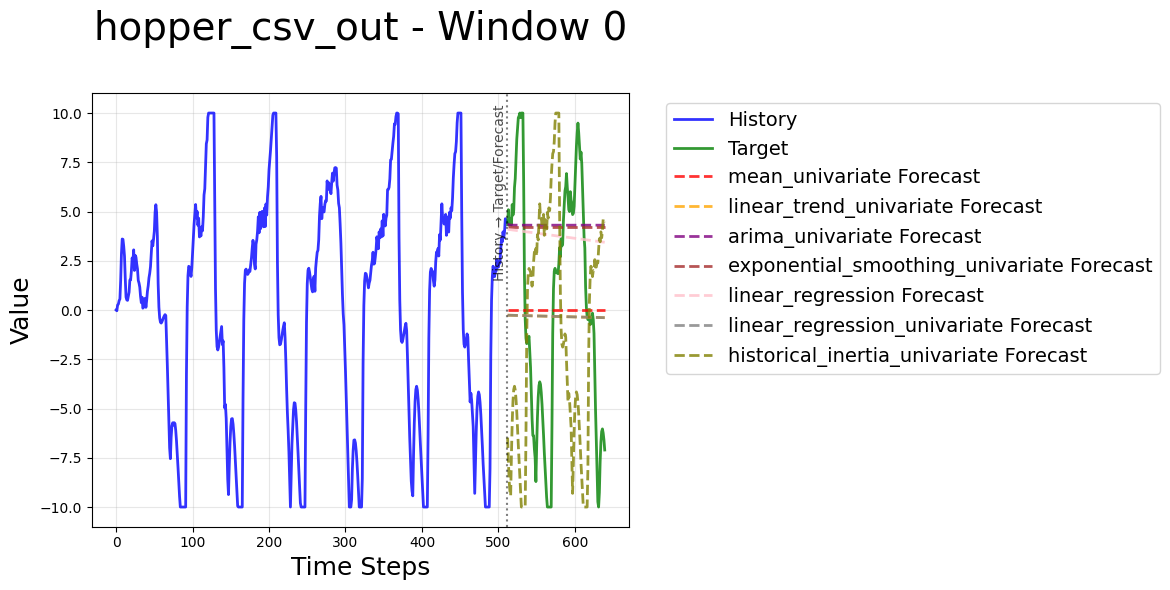

Saved plot 7: spriteworld - Window 1 to ../../multieval_runs/baseline_models/plots/baseline_forecast_1.png
Started Processing ant_csv_out - Window 2
Plot saved to: ../../multieval_runs/baseline_models/plots/baseline_forecast_2.png


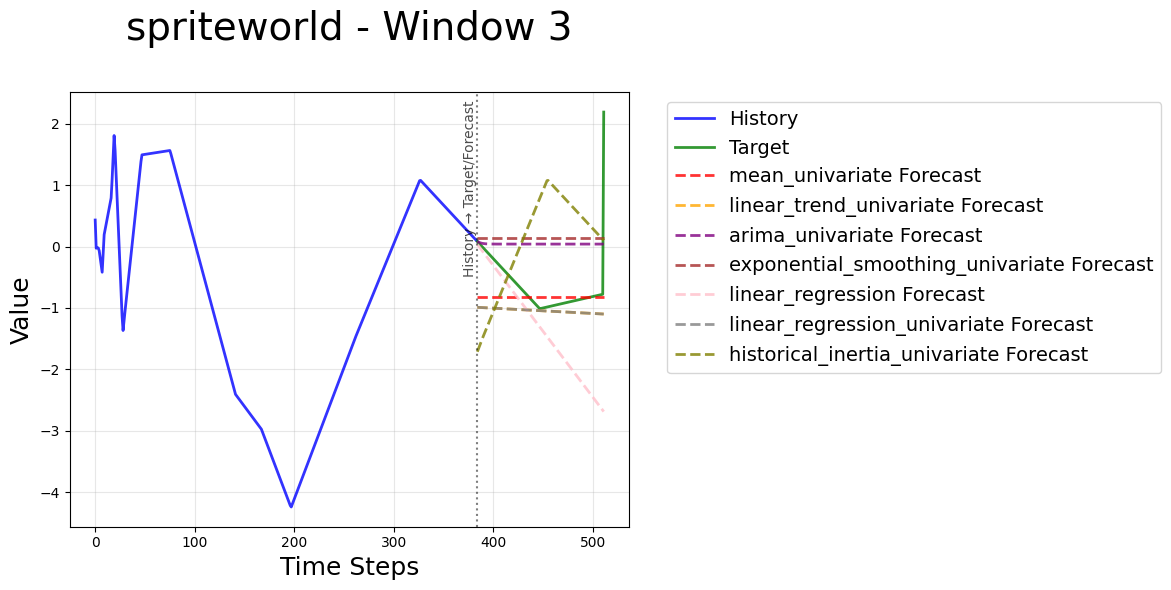

Saved plot 13: ant_csv_out - Window 2 to ../../multieval_runs/baseline_models/plots/baseline_forecast_2.png
Started Processing cheetah_csv_out - Window 3
Plot saved to: ../../multieval_runs/baseline_models/plots/baseline_forecast_3.png


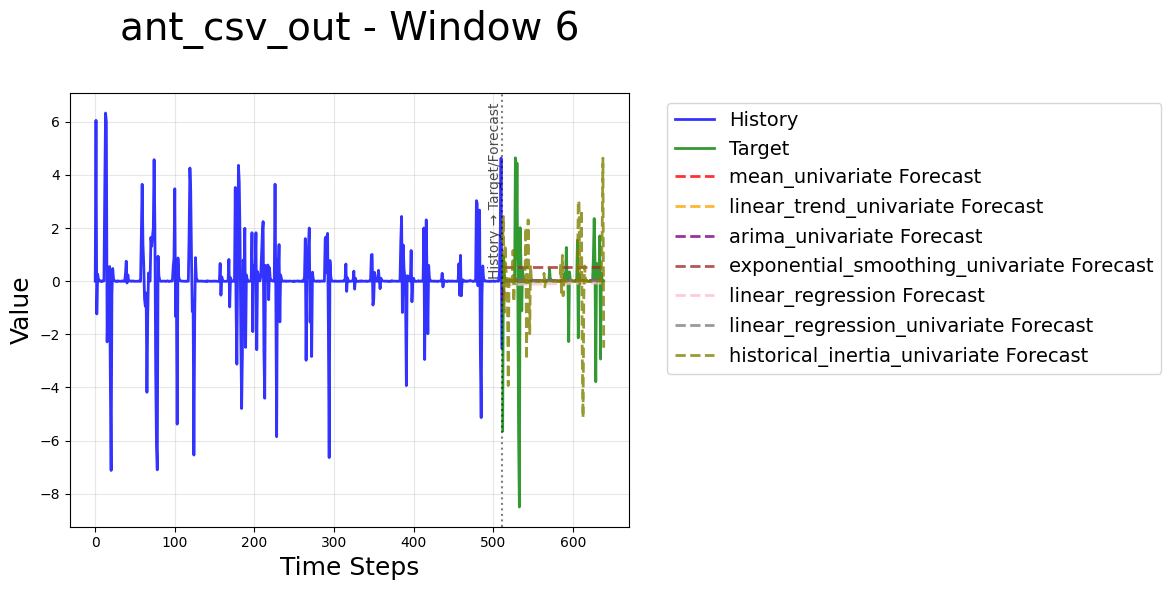

Saved plot 19: cheetah_csv_out - Window 3 to ../../multieval_runs/baseline_models/plots/baseline_forecast_3.png
Started Processing walker2d_csv_out - Window 4
Plot saved to: ../../multieval_runs/baseline_models/plots/baseline_forecast_4.png


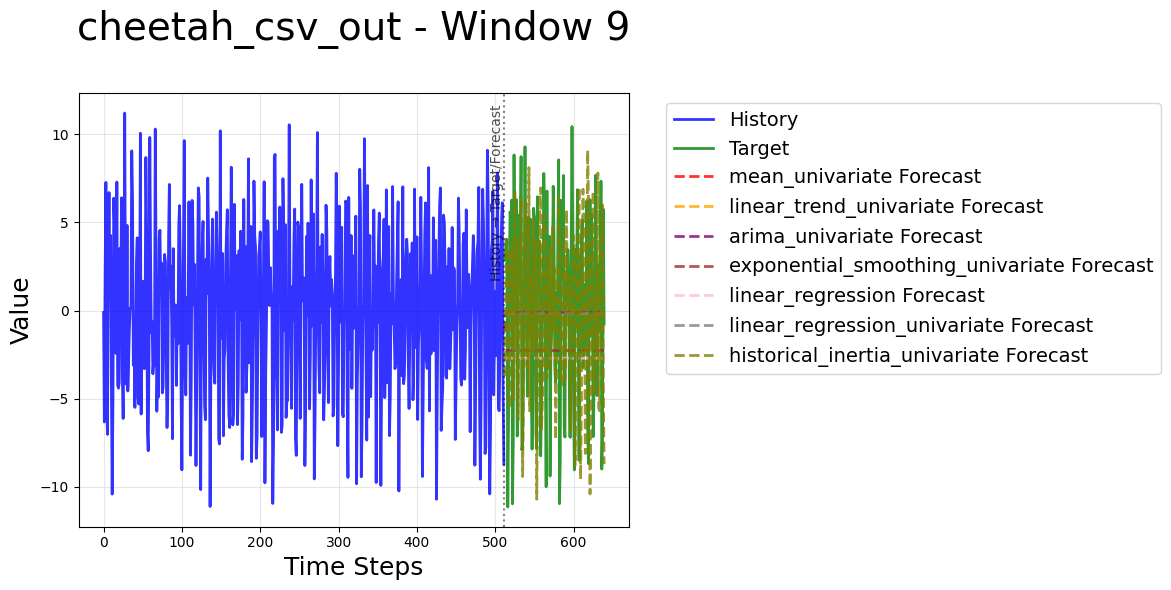

Saved plot 25: walker2d_csv_out - Window 4 to ../../multieval_runs/baseline_models/plots/baseline_forecast_4.png
Started Processing KITTI - Window 5
Plot saved to: ../../multieval_runs/baseline_models/plots/baseline_forecast_5.png


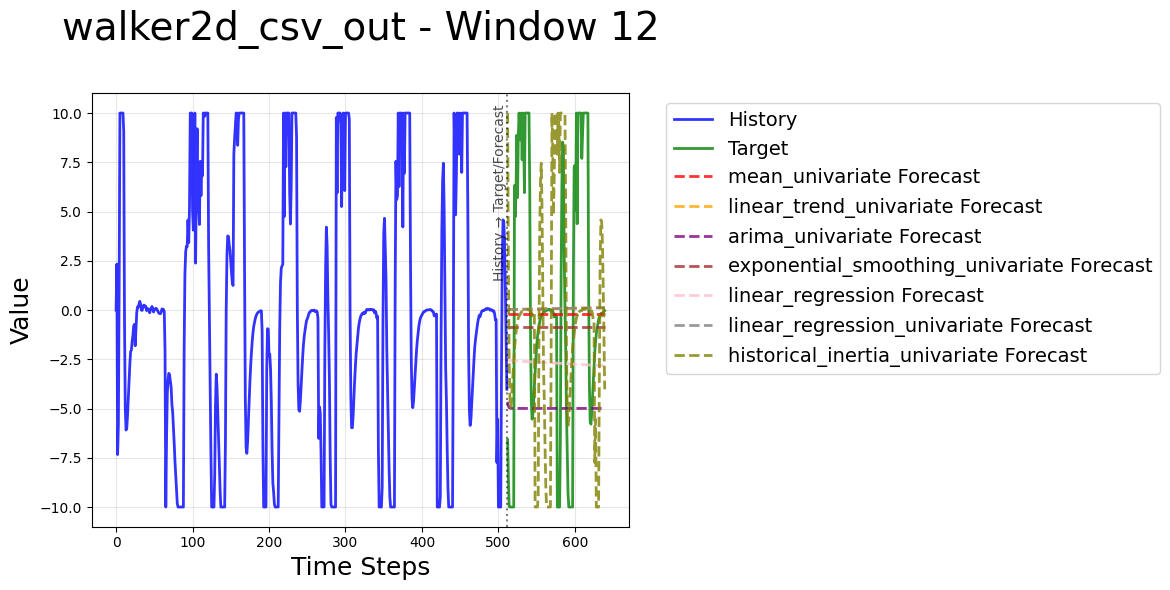

Saved plot 31: KITTI - Window 5 to ../../multieval_runs/baseline_models/plots/baseline_forecast_5.png
Started Processing openwebtext_timeseries_csvs - Window 6
Plot saved to: ../../multieval_runs/baseline_models/plots/baseline_forecast_6.png


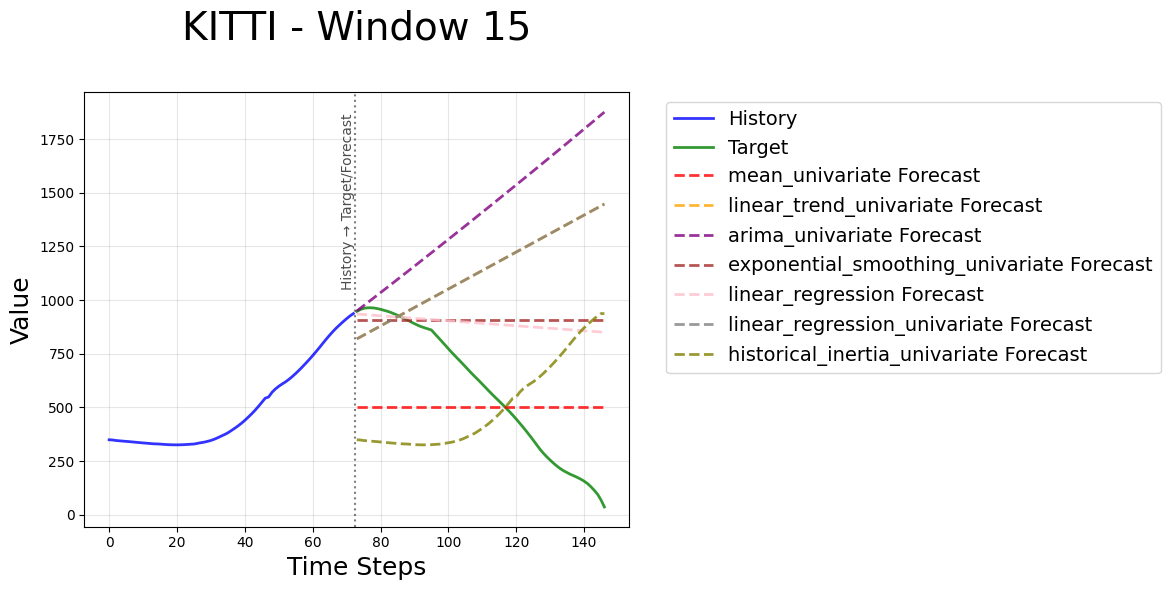

Saved plot 37: openwebtext_timeseries_csvs - Window 6 to ../../multieval_runs/baseline_models/plots/baseline_forecast_6.png
Started Processing cifar100_timeseries_csvs - Window 7
Plot saved to: ../../multieval_runs/baseline_models/plots/baseline_forecast_7.png


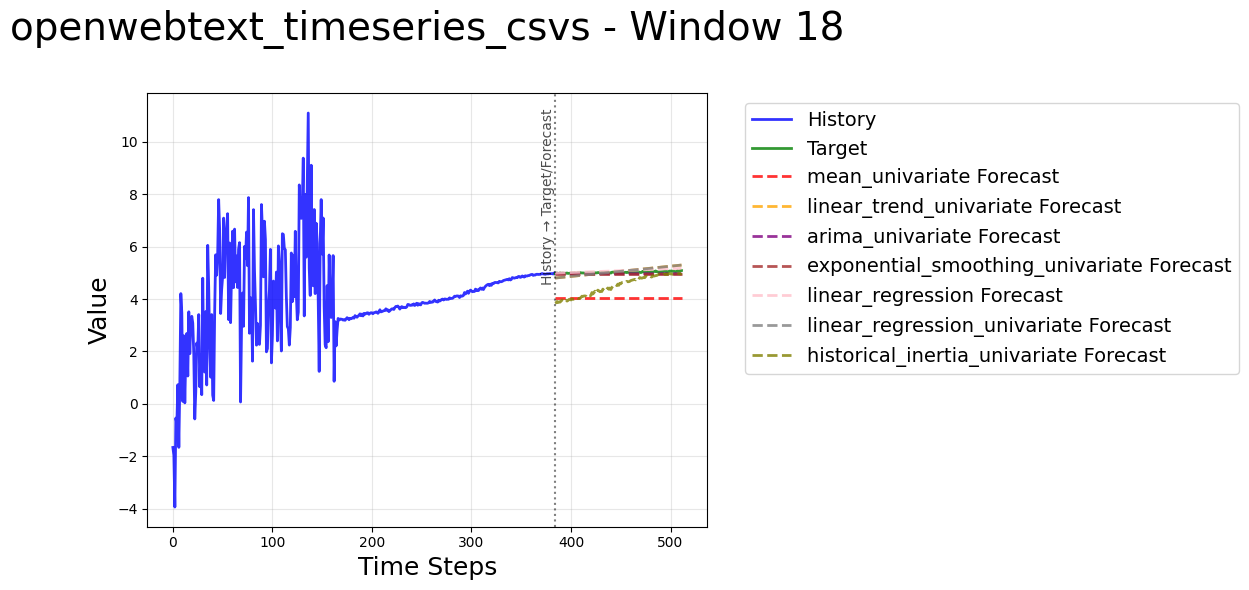

Saved plot 43: cifar100_timeseries_csvs - Window 7 to ../../multieval_runs/baseline_models/plots/baseline_forecast_7.png
Started Processing fl_electricity - Window 8
Plot saved to: ../../multieval_runs/baseline_models/plots/baseline_forecast_8.png


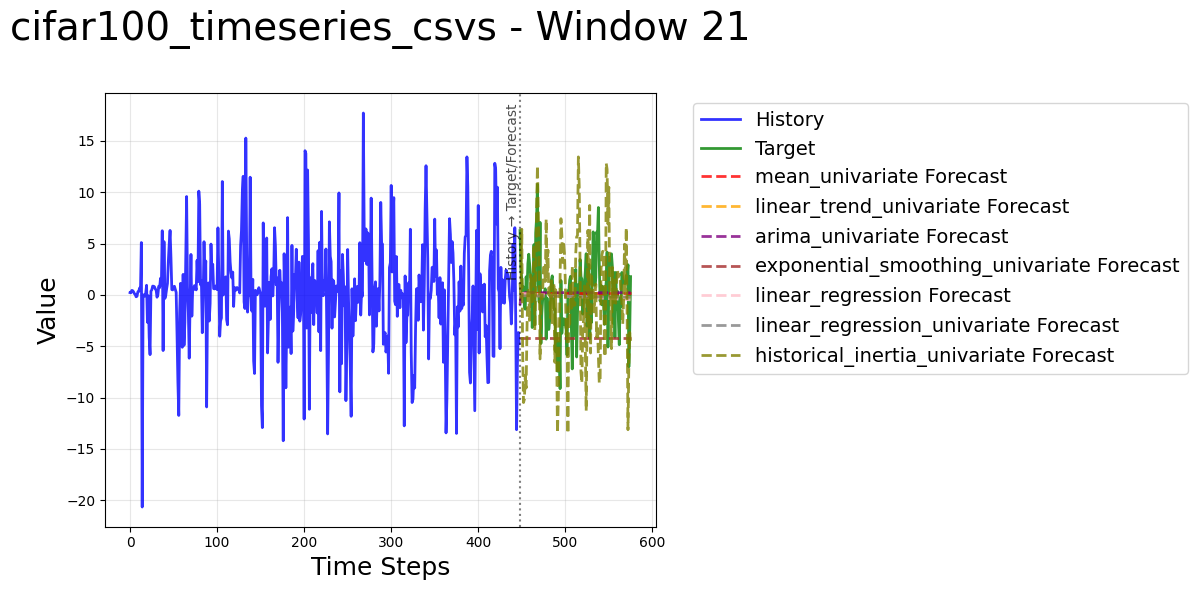

Saved plot 49: fl_electricity - Window 8 to ../../multieval_runs/baseline_models/plots/baseline_forecast_8.png
Started Processing ny_electricity2025 - Window 9
Plot saved to: ../../multieval_runs/baseline_models/plots/baseline_forecast_9.png


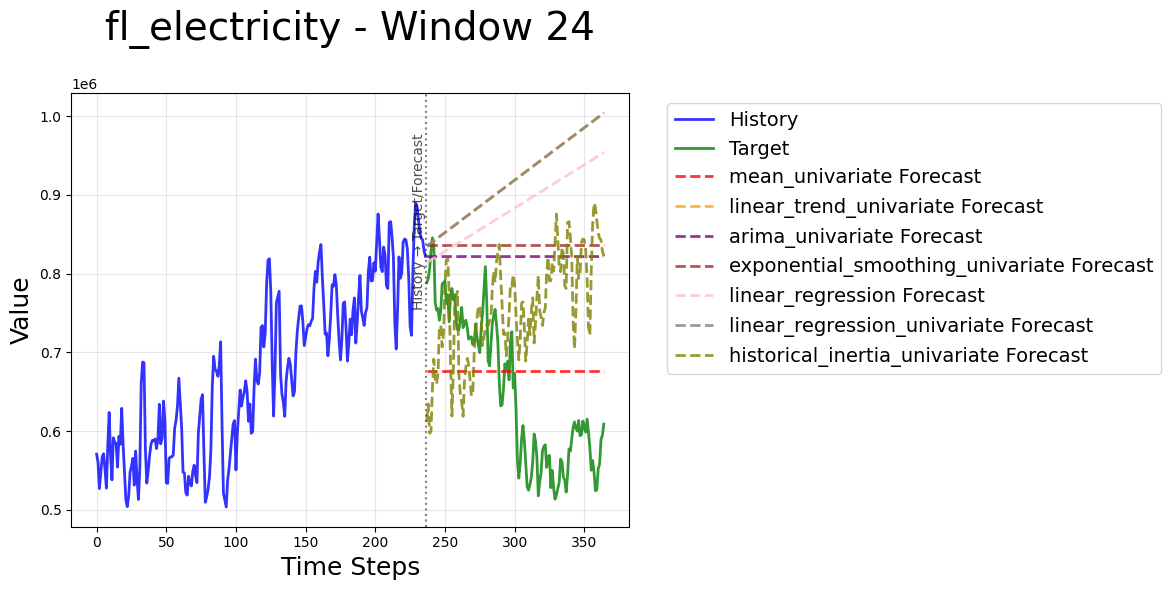

Saved plot 55: ny_electricity2025 - Window 9 to ../../multieval_runs/baseline_models/plots/baseline_forecast_9.png
Started Processing ecl - Window 10
Plot saved to: ../../multieval_runs/baseline_models/plots/baseline_forecast_10.png


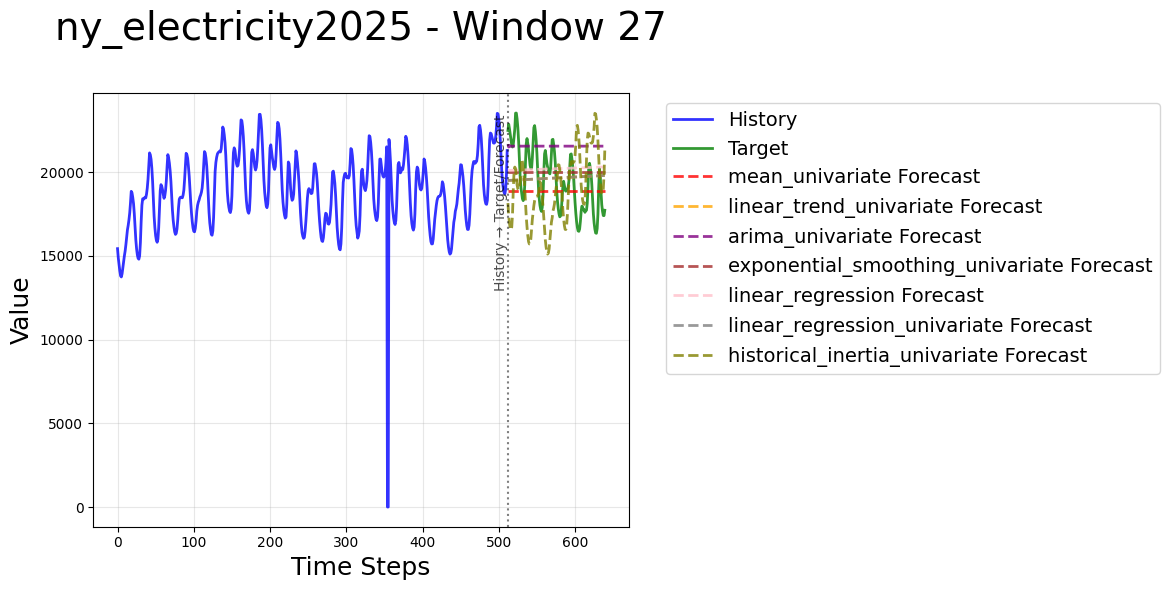

Saved plot 61: ecl - Window 10 to ../../multieval_runs/baseline_models/plots/baseline_forecast_10.png


True

In [6]:
import copy
from examples.run_multieval import generate_forecast_plots

generate_forecast_plots(results, OUTPUT_DIR, limit_windows=10)

In [7]:
# Export hierarchical results to CSV
export_hierarchical_results_to_csv(results, output_dir=OUTPUT_DIR)


Exporting Hierarchical Results to CSV
✓ Cleaned directory: ../../multieval_runs/baseline_models/categories
✓ Cleaned directory: ../../multieval_runs/baseline_models/domains
✓ Cleaned directory: ../../multieval_runs/baseline_models/datasets
✓ Dataset results saved: mean_dataset_results.csv
✓ Dataset results saved: linear_trend_dataset_results.csv
✓ Dataset results saved: arima_dataset_results.csv
✓ Dataset results saved: exponential_smoothing_dataset_results.csv
✓ Dataset results saved: linear_regression_dataset_results.csv
✓ Dataset results saved: linear_regression_univariate_dataset_results.csv
✓ Dataset results saved: historical_inertia_dataset_results.csv

Hierarchical CSV files saved to:
  Categories: ../../multieval_runs/baseline_models/categories/
  Domains: ../../multieval_runs/baseline_models/domains/
  Datasets: ../../multieval_runs/baseline_models/datasets/


In [8]:
# Display results summary
print("\nBaseline Models Results Summary:")
print("=" * 50)

for model_name in models.keys():
    if model_name in results:
        model_results = results[model_name]
        print(f"\n{model_name.upper()}:")
        print(f"  Total windows processed: {model_results['windows']}")
        print(f"  Total time: {model_results['time']:.2f} seconds")
        
        if model_results['metrics']:
            metrics = model_results['metrics']
            print(f"  Average MAPE: {metrics.get('MAPE', 'N/A'):.2f}%")
            print(f"  Average MAE: {metrics.get('MAE', 'N/A'):.4f}")
            print(f"  Average RMSE: {metrics.get('RMSE', 'N/A'):.4f}")
            print(f"  Average NMAE: {metrics.get('NMAE', 'N/A'):.4f}")

print(f"\nResults saved to: {OUTPUT_DIR}")



Baseline Models Results Summary:

MEAN:
  Total windows processed: 242
  Total time: 30.90 seconds
  Average MAPE: 114.48%
  Average MAE: 4527233.1190
  Average RMSE: 6133160.4940
  Average NMAE: 1.1327

LINEAR_TREND:
  Total windows processed: 242
  Total time: 30.91 seconds
  Average MAPE: 198.09%
  Average MAE: 5701466.8489
  Average RMSE: 7400084.8207
  Average NMAE: 1.3527

ARIMA:
  Total windows processed: 242
  Total time: 30.91 seconds
  Average MAPE: 163.66%
  Average MAE: 4500608.8742
  Average RMSE: 6004310.0860
  Average NMAE: 1.3318

EXPONENTIAL_SMOOTHING:
  Total windows processed: 242
  Total time: 30.92 seconds
  Average MAPE: 130.98%
  Average MAE: 5270101.4638
  Average RMSE: 6952102.3823
  Average NMAE: 1.1921

LINEAR_REGRESSION:
  Total windows processed: 242
  Total time: 30.92 seconds
  Average MAPE: 1730.45%
  Average MAE: 4570485.3160
  Average RMSE: 6147590.8755
  Average NMAE: 1.4106

HISTORICAL_INERTIA:
  Total windows processed: 242
  Total time: 30.93 seco

## Summary

This notebook demonstrates how to run traditional baseline forecasting models on the MultiTS-Eval benchmark using the efficient functions from `run_multievalfm.py`. 

### Key Benefits:

1. **Comprehensive Baseline**: Tests multiple traditional forecasting methods
2. **Efficient**: Uses optimized evaluation functions instead of custom loops
3. **Comparative**: Allows direct comparison between different baseline models
4. **Visual**: Generates plots showing how each model performs
5. **Minimal code**: Only ~10 cells vs. hundreds of lines in custom evaluation

### Models Tested:

- **Mean Forecast**: Simple average of historical values
- **Linear Trend**: Linear regression on time
- **ARIMA**: AutoRegressive Integrated Moving Average
- **Exponential Smoothing**: Weighted average with exponential decay

### Functions Used:

- `run_models_on_benchmark()`: Main evaluation function
- `compare_model_performance()`: Performance comparison
- `export_hierarchical_results_to_csv()`: Hierarchical CSV export
- `plot_window_forecasts()`: Individual forecast visualization
- `plot_multiple_windows()`: Multi-window comparison
- `plot_baseline_comparison()`: Model comparison with metrics

This approach provides a solid baseline for comparing more advanced models like Chronos Bolt, and leverages the existing, well-tested evaluation framework while keeping the notebook clean and efficient.


In [9]:
from examples.save_submission import save_submission
# Generate submission files for competition
if 'results' in locals() and results:
    submission_dir = os.path.join(OUTPUT_DIR, "submissions")
    save_submission(results, submission_dir)
    print(f"Submission files saved to: {submission_dir}")
else:
    print("No results available for submission generation.")


Submission file saved to: ../../multieval_runs/baseline_models/submissions/mean_submission.json
Model: mean
Total datasets: 83
Domains: 16
Categories: 4

Submission file saved to: ../../multieval_runs/baseline_models/submissions/linear_trend_submission.json
Model: linear_trend
Total datasets: 83
Domains: 16
Categories: 4

Submission file saved to: ../../multieval_runs/baseline_models/submissions/arima_submission.json
Model: arima
Total datasets: 83
Domains: 16
Categories: 4

Submission file saved to: ../../multieval_runs/baseline_models/submissions/exponential_smoothing_submission.json
Model: exponential_smoothing
Total datasets: 83
Domains: 16
Categories: 4

Submission file saved to: ../../multieval_runs/baseline_models/submissions/linear_regression_submission.json
Model: linear_regression
Total datasets: 83
Domains: 16
Categories: 4

Submission file saved to: ../../multieval_runs/baseline_models/submissions/historical_inertia_submission.json
Model: historical_inertia
Total datasets: 